
# Project: Investigate a Dataset (No-Show Appointment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset (**No-show Appointment**) collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- ScheduledDay tells us on what day the patient set up their appointment.
- Neighborhood indicates the location of the hospital.
- Scholarship indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## The Content
The dataset contains medical appointment records of (**110,527**) and **14** associated fields(features)  

# columns

-  `PatientId`  > Patient Idention
- `AppointmentID` > Identifition of appointment
- `Gender`     >    Male (M) or Female (F). 
- `ScheduledDay` > The day a patient register for appointment.
-  `AppointmentDay` > The day a patient visit the medical doctor 
- `Age`            > Age of the patient
-  `Neighbourhood`   > Where the appointment occures 
-   `Scholarship`   >  If the patient is on free medical, this holds True(1) False(0) 
-   `Hipertension` >   Holds True(1) False(0)  
-   `Diabetes`        >Holds True(1) False(0)  
-  `Alcoholism`     >Holds True(1) False(0) 
-  `Handcap`   >      Disability of the patient 
-  `SMS_received` >   message sent to patient  
-  `No-show` > Holds No or Yes

In [3]:
# Import the dependencies libraries/packages for our analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> We will be using both Visual and Programmatic assessment to investiage the No-show appointment Dataset, and after litte familiarization of the dataset we'll try to answer the following questions.

### Question
Q1: The pacentage of patient show-up for appointment

Q2: Does `Gender` Affect the Attendence?

Q3: Does `Scholarship` Affect the Attendance?

Q4: Does `SMS` Affect the Attendance?

Q5: Does `Age` Affect the Attendance?

Q6: `Neighbourhoods` with highest Number of Absent

Q7: Get `Single record/observation`for a patient 


### General Properties

In [4]:
# Function to read a Comma separated values (CSV) file
def load_data(arg):
    df = pd.read_csv(arg)
    
    return df

data = load_data('noshowappointments-kagglev2-may-2016.csv')

# Show the top three records include the heading features
data.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [5]:
# Print the last five records of the dataset
data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
# Prints the number of rows and columns of our Dataset
data.shape

(110527, 14)

The dataset contained **110527** Rows and **14** Columns

In [7]:
# Print more information about the DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data types shown **ScheduledDay and AppointmentDay** as obejct/string should be datetime/int

In [8]:
# Check of duplicated values in the dataset
data.duplicated().any()

False

Found no duplicated rows in the dataset

In [9]:
# Checking for missing values in the dataset
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Found **No missing** data in the dataset

In [10]:
# Print the number Male and Female present in the dataset
data.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [11]:
# Print Number of unique Patient ID
data.PatientId.nunique()

62299

In [12]:
#Print number of dulicated Patient ID
data.PatientId.duplicated().sum()

48228

In [13]:
# Print the no-shows values count
data['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

The dateset shown **88208** patient showed up to their appointment and **22319** didn't showed up

In [14]:
# Print duplicated 'Patient Id' with the 'No-show' status.
data.duplicated(['PatientId', 'No-show']).sum()

38710

The dataset contained **38,710** Patient having the same **"no-show"** status or duplicated rows 
that will be Dropped in the Cleaning phase

In [15]:
# Describe function the Statistical summary of the dataframe. This includes mean,count,min-max etc.
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
# Invesitage the Age variable using describe function
data.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

- The **average ages** in the dataset is **37**, and the **heighest** is **115**.
- The dataset showns **50%** of Ages are between the **18** and **55**
- A **min age** of **-1** shown in the dataset that will be **dropped in cleaning stage**

In [17]:
# Check for any other Age less than 0
negative_record = data.query('Age < 0')
negative_record

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There is a female patient with negative of **-1** Age value, we'll this to make our analysis suitable 

# Data Cleaning

Now that we've conducted visual and programmatics accessments in the dataset, at least we now know some of the necessary fields, records that we will be cleaning to make our data analysis more suitable. We've identify the following steps to reference in our data cleaning process.
- Drop the 'Handcap' Column
- Change the 'ScheduledDay' Datatype from String to Datetime
- Change the 'AppointmentDay' Datatype from String to Datetime
- Drop the row in the 'Age' coulum that less than < 0 
- Extract the date only from the timestamp of the ScheduledDay and AppointmentDay
- Rename some columns to make them consistent like the others
- Drop duplication rocord with the PatientId No-show status


**NOTE**
- **Visual assessment** This involves looking at your dataset in its entirety in whatever program you like. For example reading a **CSV file** from pandas and figure out which rows or colums alread has missing values  
- **Programmatic assessment** using functions and methods to reveal something about your data's quality and tidiness. For example, in pandas, we can call the .info method to print a concise summary of a DataFrame

In [18]:
# Cope the above that set to make necessary changes/modification
clean_df = data.copy()

In [19]:
# Drop the 'Handcap' Column
clean_df.drop(['Handcap'],axis=1, inplace=True)

In [20]:
#Change the 'ScheduledDay' Datatype from String/object to Datetime
column_with_date = ['ScheduledDay','AppointmentDay']
for dates in column_with_date:
    clean_df[dates] = pd.to_datetime(pd.to_datetime(clean_df[dates]).dt.date)

clean_df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
SMS_received               int64
No-show                   object
dtype: object

We've change the ScheduledDay and AppointmentDay from object/string datatype to datatime

In [21]:
# Confirm that the 'ScheduledDay' and 'AppointmentDay' are extracted from object/string
# The sample function takes rendom rocords from the dataset
clean_df.sample(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
31678,3.471615e+13,5686108,M,2016-05-11,2016-05-13,0,DO CABRAL,0,0,0,0,0,No
73557,3.828862e+12,5636779,M,2016-04-28,2016-05-03,64,MARIA ORTIZ,0,0,0,0,1,No


In [22]:
# Drop the row in the 'Age' coulum that less than < 0 
clean_df.drop(negative_record.index, inplace=True)

# Check to confirm record dropped
clean_df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show


**Negetive Record (-1)** was dropped successfully

In [23]:
# Here we use the rename method to make the selected columns look more consistent in appearance 
# and the 'inplace' to be Ture in order the change to be reflected
clean_df.rename(columns={
                    'PatientId': 'Patient_Id',
                    'AppointmentID': 'Appointment_Id',
                    'ScheduledDay':'Scheduled_Day',
                    'AppointmentDay':'Appointment_Day',
                    'SMS_received':'SMS_Received',
                    'No-show':'No_Show',
                    'Hipertension':'Hypertension'}, inplace=True)
# confirm changes
clean_df.sample(3)

,Patient_Id,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_Received,No_Show
41053,5.968656e+12,5563484,M,2016-04-08,2016-05-12,64,MARIA ORTIZ,0,0,0,0,1,No
49424,3.515454e+11,5650596,M,2016-05-03,2016-05-03,1,SANTOS DUMONT,1,0,0,0,0,No
49800,1.579781e+11,5596479,F,2016-04-18,2016-05-11,74,JARDIM DA PENHA,0,0,0,0,1,No


In [24]:
#Drop duplication rocord with the PatientId No-show status
clean_df.drop_duplicates(['Patient_Id', 'No_Show'], inplace=True)

#Confirm changes
clean_df.shape

(71816, 13)

After duplicates records removed from the dataset we've **71816** Rows and **13** Columns

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

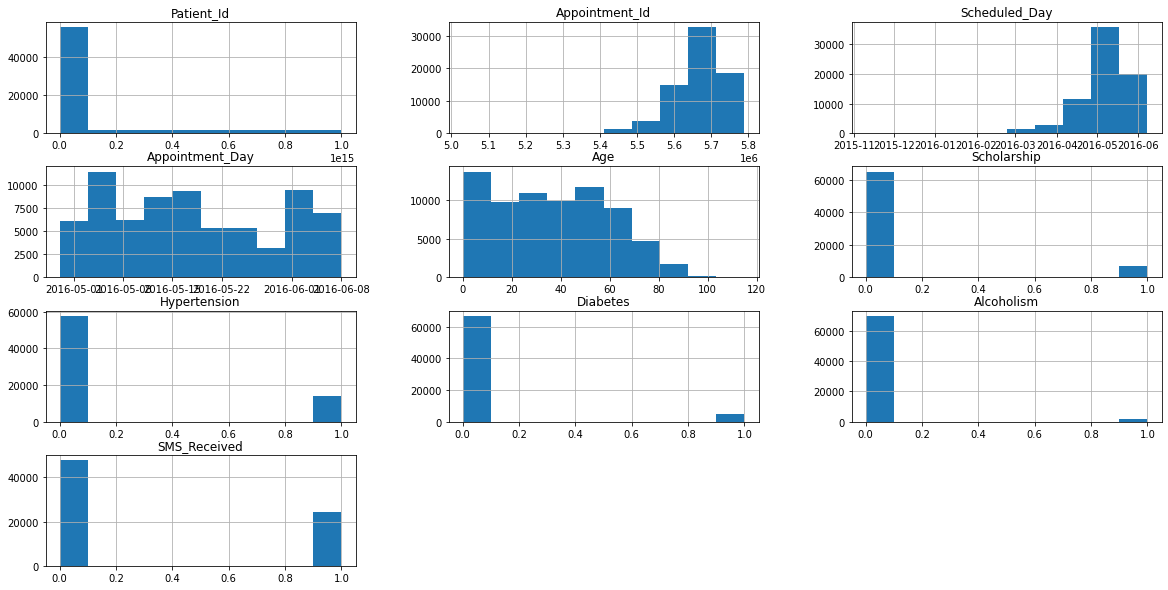

In [25]:
# General visual exploratory
clean_df.hist(figsize=(20,10));

In [26]:
# We've set the Attend Variable for the No_Show 'No' and Absent for the 'Yes' variable
Attend = clean_df.No_Show == 'No'
Absent = clean_df.No_Show == 'Yes'

### Q1. The pacentage of patient show-up for appointment

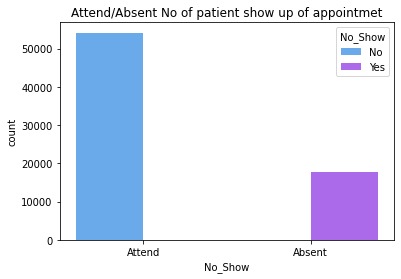

In [27]:
# Let see the number of patient show up for appointment (Attend or Not)
show = sns.countplot(x='No_Show', data=clean_df, hue='No_Show', palette='cool');
show.set_title('Attend/Absent No of patient show up of appointmet');
show.set_xticklabels(['Attend', 'Absent']);

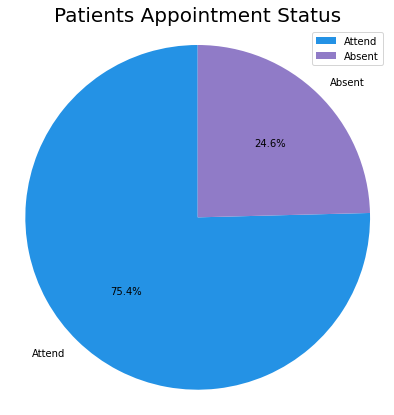

In [28]:
# Let's Plot the pacentage of patient show-up for appointment
pie_show = clean_df.No_Show.value_counts()
colors = ['#2492e5','#907bc7']
plt.figure(figsize=(15,7))
plt.pie(pie_show, labels=['Attend', 'Absent'], startangle=90,
        counterclock=True, autopct='%1.1f%%', colors=colors)
plt.axis('square')
plt.legend(loc='upper right')
plt.title('Patients Appointment Status', fontsize=20);

The dataset shown **75.4%** of Patient Attend and **24.6%** Absent

### Q2: Does `Gender` Affect the Attendence?

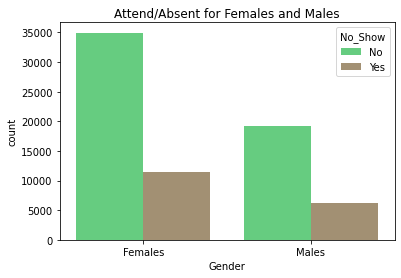

In [29]:
show=sns.countplot(x=clean_df.Gender, data=clean_df, hue='No_Show', palette='terrain')
show.set_title('Attend/Absent for Females and Males')
show.set_xticklabels(['Females', 'Males'])
plt.show()

In [30]:
# Query the dataset to get gender analysis 
F_attend = clean_df.query('Gender == "F" & No_Show == "No"').value_counts().sum()
F_absent = clean_df.query('Gender == "F" & No_Show == "Yes"').value_counts().sum()
M_attend = clean_df.query('Gender == "M" & No_Show == "No"').value_counts().sum()
M_absent = clean_df.query('Gender == "M" & No_Show == "Yes"').value_counts().sum()

color_counts = clean_df.groupby(['Gender']).count()['No_Show']

print(f'Female attend: {F_attend}, Female Absent: {F_absent}')
print(f'Male attend: {M_attend}, Male Absent: {M_absent}')
print(color_counts)

Female attend: 34960, Female Absent: 11506
Male attend: 19193, Male Absent: 6157
Gender
F    46466
M    25350
Name: No_Show, dtype: int64


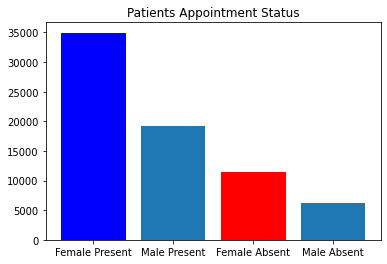

In [31]:
show=plt.bar([1,2,3,4],[F_attend,M_attend,F_absent,M_absent], 
        tick_label=['Female Present','Male Present','Female Absent','Male Absent'])
plt.title('Patients Appointment Status');
show[0].set_color('b')
show[2].set_color('r')
plt.show()

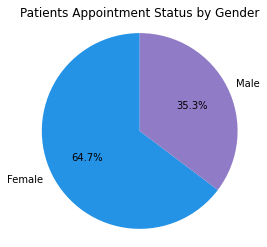

In [32]:
# Patients Appointment Status by Gender
pie_show = clean_df['Gender'].value_counts()
colors = ['#2492e5','#907bc7']
plt.pie(pie_show, labels=['Female', 'Male'], startangle=90,
        counterclock=True, autopct='%1.1f%%', colors=colors)
plt.axis('square')
plt.title('Patients Appointment Status by Gender');

● **64.7%** of patients are **Females** (46,466), **75%** of them **Attend** (34,960), and **25% Absent** (11,506) 

● **35.3%** of patients are **Mens** (25,350), **75%** of them **Attend** (19,193) and **25% Absent** (6,157)

**● The Precentage of Absence = 25% for Each Gender
● The Precentage of Attendence = 75%  for Each Gender**

● **No** Correlation Between **Gender** and **Attendence**.

### Q3: Does Scholarship Affect the Attendance?

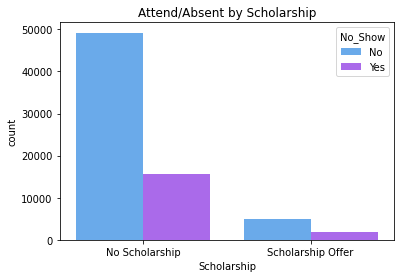

In [33]:
# A bar chart with proper labels to Compare the 'Attendance status' According To 'Scholarship Status'
g=sns.countplot(x=clean_df.Scholarship, hue='No_Show', data=clean_df, palette='cool')
plt.title('Attend/Absent by Scholarship');
g.set_xticklabels(['No Scholarship', 'Scholarship Offer']);

● The dateset **90%** of all patients **`have no Scholarship offer`** = 64,955:**75% attend** = 49,207,**25% absent** = 15,748

● Only **10**% of all patients **`have Scholarship`** = 6,861:**72% attend** = 4,946 ,**28% absent** = 1,915

● There is **`NO`** Correlation Between **`have Scholarship or not`** and the **`Attendance`**

### Q4: Does SMS  Affect the Attendance

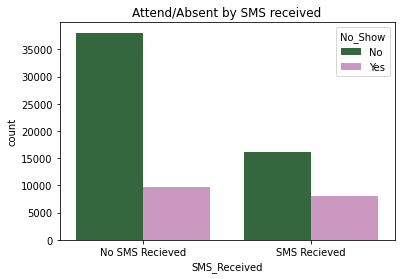

In [34]:
# Create a bar for attendance base on SMS received 
g = sns.countplot(x=clean_df.SMS_Received, hue=clean_df.No_Show, data=clean_df, 
                   palette='cubehelix')
g.set_title('Attend/Absent by SMS received')
x_ticks_labels=['No SMS Recieved', 'SMS Recieved']
g.set_xticklabels(x_ticks_labels);

● **66%** of all patients ** Not Recieved SMS ** = 47,717 **:** **80% Attend** = 38,057 **,** **20% Absent** = 9,660

● **34%** of all patients **Recieved SMS ** = 24,099 **:** **67% Attend** = 16,096 **,** **33% Absent** = 8,003

### Q5: Does Age Affect the Attendance?

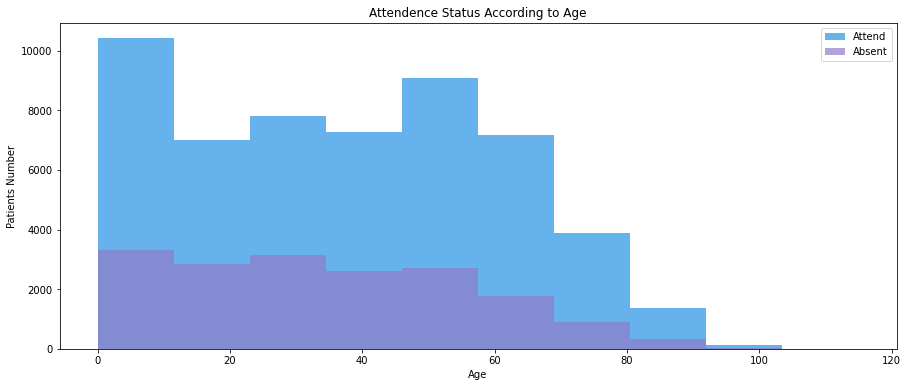

In [35]:
# A histogram to Compare the 'Attendence status' According To 'Age'
plt.figure(figsize=[15,6])
clean_df[Attend]['Age'].plot(kind='hist', alpha=0.7, color='#2492e5', label='Attend')
clean_df[Absent]['Age'].plot(kind='hist', alpha=0.7, color='#907bc7', label='Absent')
plt.legend();

# Set the title and label axes 
plt.title('Attendence Status According to Age')
plt.xlabel('Age');
plt.ylabel('Patients Number');
plt.show()

**● Ages from 0 to 10 are the Most Attendance (parents take care of their kids)**
**● Ages above 65 are the Least Attendance** 
 
 Technically the number of attendance for each age is gratethan abasence
  Patients with **Age** gratethan 65 years number decreased but the num of attend is still bigger than the absent 

● **NO** Correlation Between **Age** and **Attendance**

##  Q6. Neighbourhoods with highest Number of Absent ##

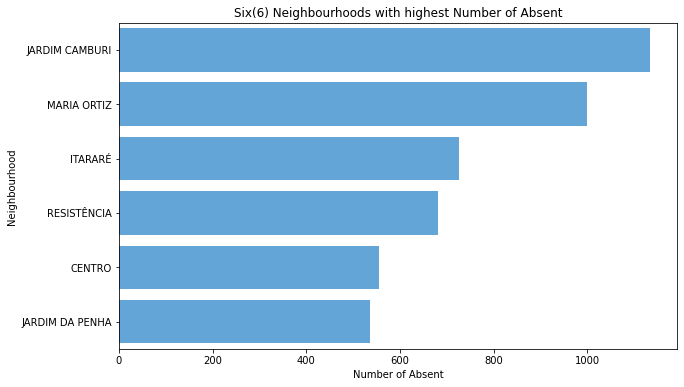

In [36]:
# Top six Neighbourhoods in with highest Number of No Show Appointments
clean_df = clean_df[clean_df.No_Show == "Yes"]

plt.figure(figsize = [10, 6])
order = clean_df['Neighbourhood'].value_counts().index[:6]
sns.countplot(data = clean_df, y = 'Neighbourhood', color ="#2492e5", order = order, alpha=.8)
plt.title('Six(6) Neighbourhoods with highest Number of Absent')
plt.xlabel('Number of Absent')
plt.ylabel('Neighbourhood');

The chart shown, JARDIM CAMBURI neighbourhood had the heighest number of missed appointments followed by MARIA ORTIZ and the rest

## Q7 Print a `Single recor/observation`for a patient with index number

In [37]:
# Let's print a single observation for a patient with index id 25
def single_observation(patient):
    observation = clean_df.iloc[[patient]]
    return observation

# Call the single obeservation function to print a specific row.
observe = single_observation(25)
observe

,Patient_Id,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_Received,No_Show
129,5.537367e+13,5560735,F,2016-04-08,2016-04-29,22,PRAIA DO SUÁ,0,0,0,0,1,Yes


**Key index = 25** passed to the single_observation
The above shows a sing patient with Appointment_Id **5624020** from Neighbourhoo **CONQUISTA** do show up/Attend. 

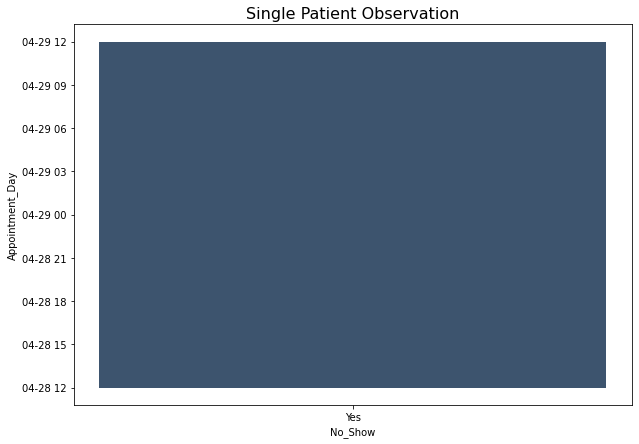

In [38]:
# Set plot single observation
plt.figure(figsize=(10,7)) 
sns.histplot(x='No_Show', y='Appointment_Day', data=observe)
plt.title('Single Patient Observation', size=16);

The Single observation wof patient with index No **25** and Appointment ID **5624020** Shown on the **29-4-2016**  did show up/Attend for appointment 

<a id='conclusions'></a>

## Conclusions
● The `Nighbourhood` has a great effect on attendance or not.  Especiall `JARDIM CAMBURI` has the greatest number of patients and also has the greatest attendence rate. Patients attandance from specific nighbourhood affected by recieving SMS and Ages

● The Number of attend patients **`without`** `recieving SMS` is **greater** than attend patients **`with`** `recieving SMS`:

● **66%** of all patients **`Not Recieved SMS`** = 47,717 **:** **80% Attend** = 38,057 **,** **20% Absent** = 9,660

● **34%** of all patients **`Recieved SMS`** = 24,099 **:** **67% Attend** = 16,096 **,** **33% Absent** = 8,003

● There is **`NO`** Correlation Between **`have Scholarship or not`** and the **`Attandence`:**

● **90%** of patients **`have no Scholarship`** = 64,955 **:** **75% Attend** = 49,207 **,** **25% Absent** = 15,748

● **10**% of patients **`have Scholarship`** = 6,861 **:** **72% Attend** = 4,946 **,** **28% Absent** = 1,915

> **Limitation**

    - The dateset convers a short period of time range from April to June
    
    - There is less correlations between features and the dateset is more of categorical  